In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_style('ticks')

In [2]:
df = pd.read_csv('insurance.csv')
pastel_palette = sns.color_palette("pastel")

# EDA Section

## Age Distribution by Categories

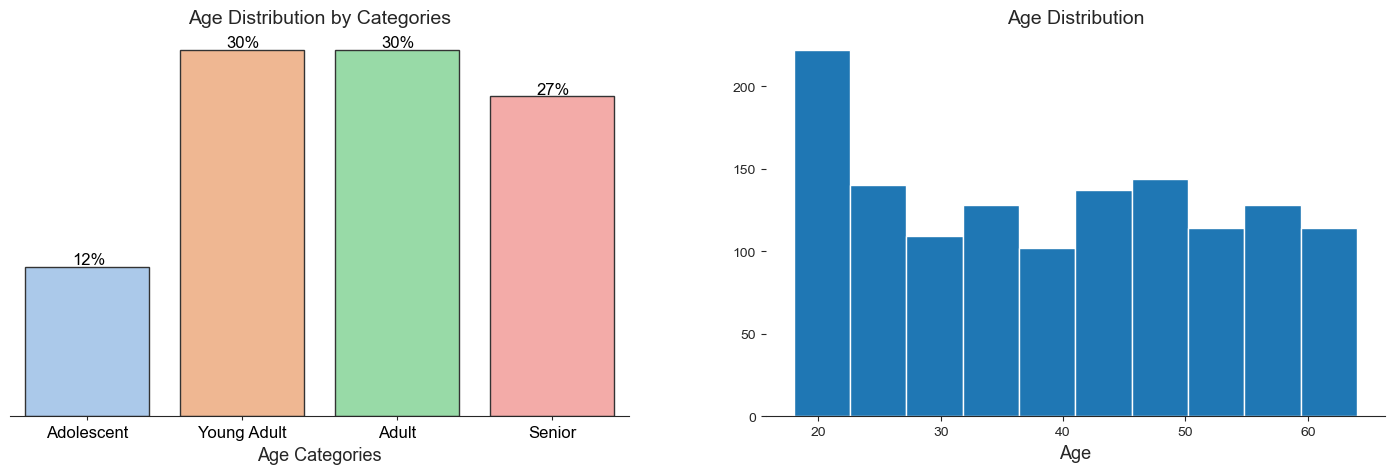

In [3]:
cut_points = [17, 20, 35, 50, 65]
label_names = ['Adolescent', 'Young Adult', 'Adult', 'Senior']
df["age_cat"] = pd.cut(df["age"], cut_points, labels=label_names)  # Categorize age
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(x='age_cat', data=df, palette='pastel', orient='v', ax=ax1, edgecolor='0.2')  # Bar plot of age categories
for i in ax1.patches:  # Add percentage labels
    ax1.text(i.get_x() + 0.3, i.get_height() + 3, str(round((i.get_height() / df.age_cat.shape[0]) * 100)) + '%', fontsize=12, color='black')
ax2.hist('age', bins=10, data=df)  # Histogram of age
ax1.set_xlabel("Age Categories", fontsize=13)
ax1.tick_params(length=3, labelsize=12, labelcolor='black')
ax1.set_title("Age Distribution by Categories", fontsize=14)
ax2.set_xlabel('Age', fontsize=13)
ax2.set_title('Age Distribution', fontsize=14)
ax1.axes.get_yaxis().set_visible(False)  # Hide y-axis on countplot
f.subplots_adjust(wspace=0.22, right=1.5)
sns.despine(left=True)  # Improve plot aesthetics
plt.show()

## Region Distribution

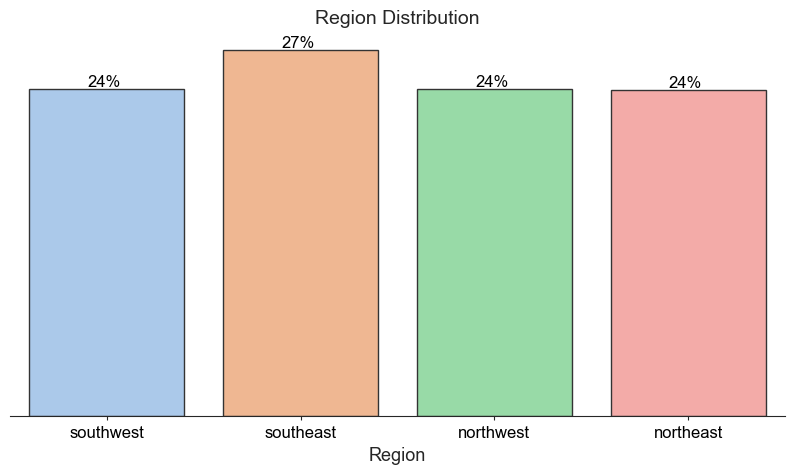

In [4]:
f, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='region', data=df, palette=pastel_palette, orient='v', ax=ax, edgecolor='0.2')
# Adding percentage labels on top of each bar for better visualization
for i in ax.patches:
    # Getting horizontal position and height to place text just above the bar
    ax.text(i.get_x() + 0.3, i.get_height() + 3,
            str(round((i.get_height() / df.region.shape[0]) * 100)) + '%', fontsize=12,
            color='black')
# Label the x-axis with a readable size
ax.set_xlabel("Region", fontsize=13)
# Tweak tick parameters for clarity
ax.tick_params(length=3, labelsize=12, labelcolor='black')
# Add a clear title to the chart
ax.set_title("Region Distribution", fontsize=14)
# Hide the y-axis for cleaner look
ax.axes.get_yaxis().set_visible(False)
# Remove left spine for a more polished design
sns.despine(left=True)
plt.show()


## Age Distribution by Gender

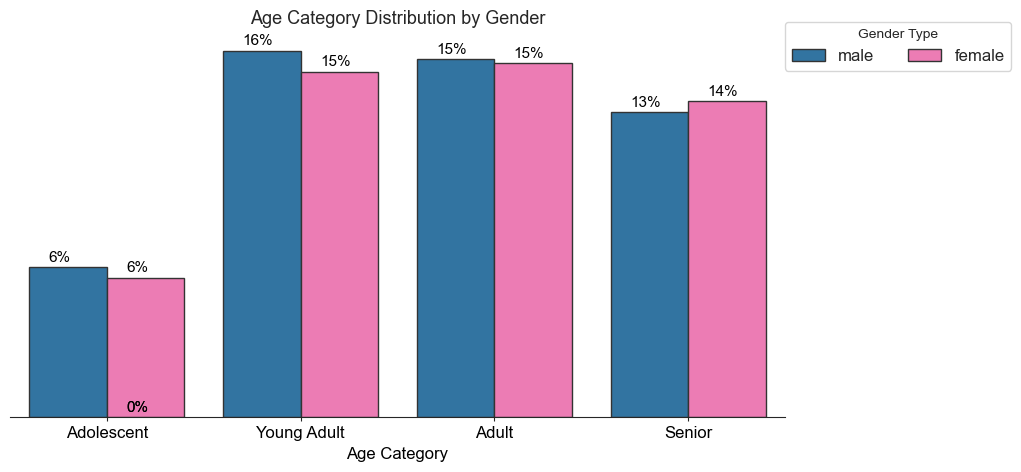

In [5]:
def gender_dist_plot(x_val, title):
    f, ax = plt.subplots(figsize=(10, 5))
    sns.countplot(x=x_val, data=df, palette=['#1f77b4', '#ff69b4'], hue='sex', hue_order=['male', 'female'], orient='v', ax=ax, edgecolor='0.2')  # Plot count by gender with logical colors
    for i in ax.patches:  # Add percentage labels on bars
        ax.text(i.get_x() + 0.1, i.get_height() + 3, str(round((i.get_height() / df.shape[0]) * 100)) + '%', fontsize=11, color='black')
    ax.set_xlabel(title, fontsize=12, color='black')
    ax.tick_params(length=3, labelsize=12, labelcolor='black')
    ax.set_title(title + ' Distribution by Gender', fontsize=13)
    ax.axes.get_yaxis().set_visible(False)  # Hide y-axis
    ax.legend(loc=[1, 0.9], fontsize=12, title='Gender Type', ncol=2)
    sns.despine(left=True)  # Clean up left spine
    return plt.show()

gender_dist_plot('age_cat', 'Age Category')

## Region Distribution by Gender

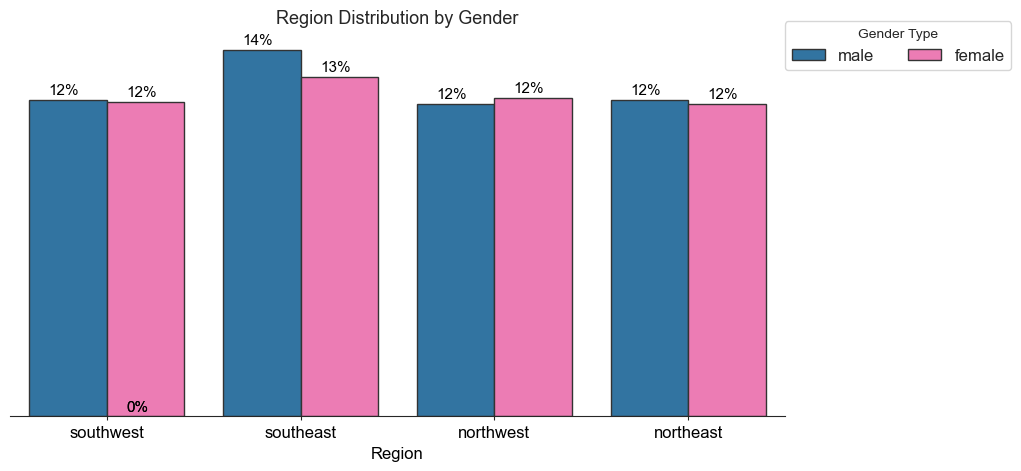

In [6]:
gender_dist_plot('region','Region')

## Region Distribution by Male Smoker

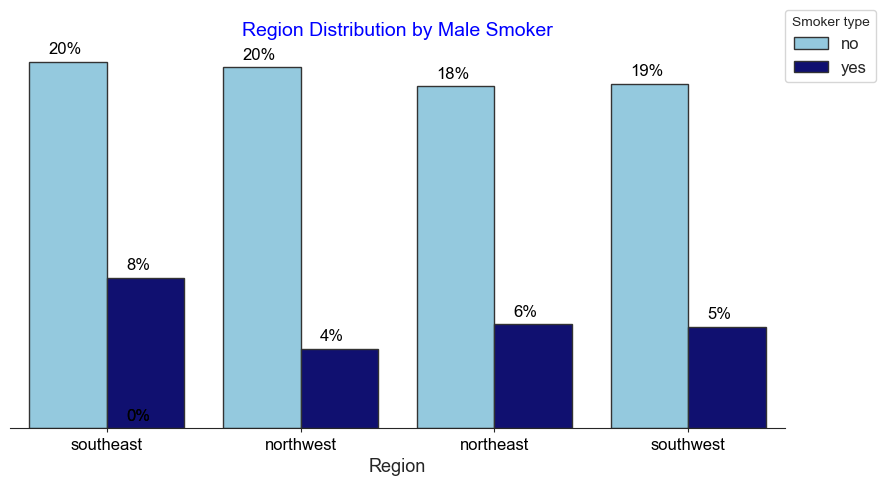

In [7]:
male_data = df[df.sex == 'male']
female_data = df[df.sex == 'female']

def sex_dist(data, gender, title_color):
    f, ax = plt.subplots(figsize=(10, 5))
    # Updated colors: blue shades represent non-smokers and smokers respectively
    sns.countplot(x='region', data=data, palette=['skyblue', 'navy'], hue='smoker', hue_order=['no', 'yes'], orient='v', ax=ax, edgecolor='0.2')
    for i in ax.patches:  # Add percentage labels on bars
        ax.text(i.get_x() + 0.1, i.get_height() + 3, str(round((i.get_height() / data.region.shape[0]) * 100)) + '%', fontsize=12, color='black')
    ax.set_xlabel("Region", fontsize=13)
    ax.tick_params(length=3, labelsize=12, labelcolor='black')
    ax.set_title('Region Distribution by ' + gender + ' Smoker', fontsize=14, color=title_color)
    ax.axes.get_yaxis().set_visible(False)  # Hide y-axis
    ax.legend(loc=[1, 0.9], fontsize=12, title='Smoker type')
    sns.despine(left=True)  # Clean up left spine
    return plt.show()

sex_dist(male_data, 'Male', 'blue')

## Region Distribution by Female Smoker

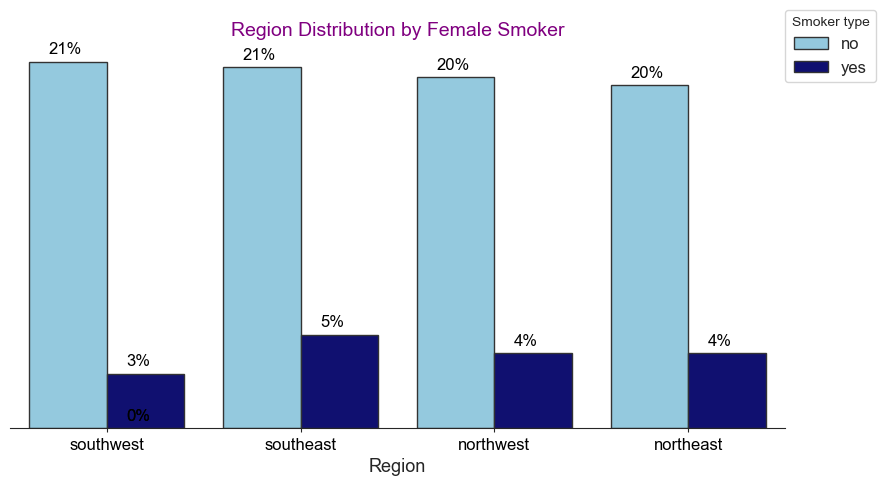

In [8]:
sex_dist(female_data,'Female','purple')

### Check ... if BMI is Normality Distributed

Skewness of bmi: 0.284
Linear model p-value (charges ~ bmi): 0.00000000


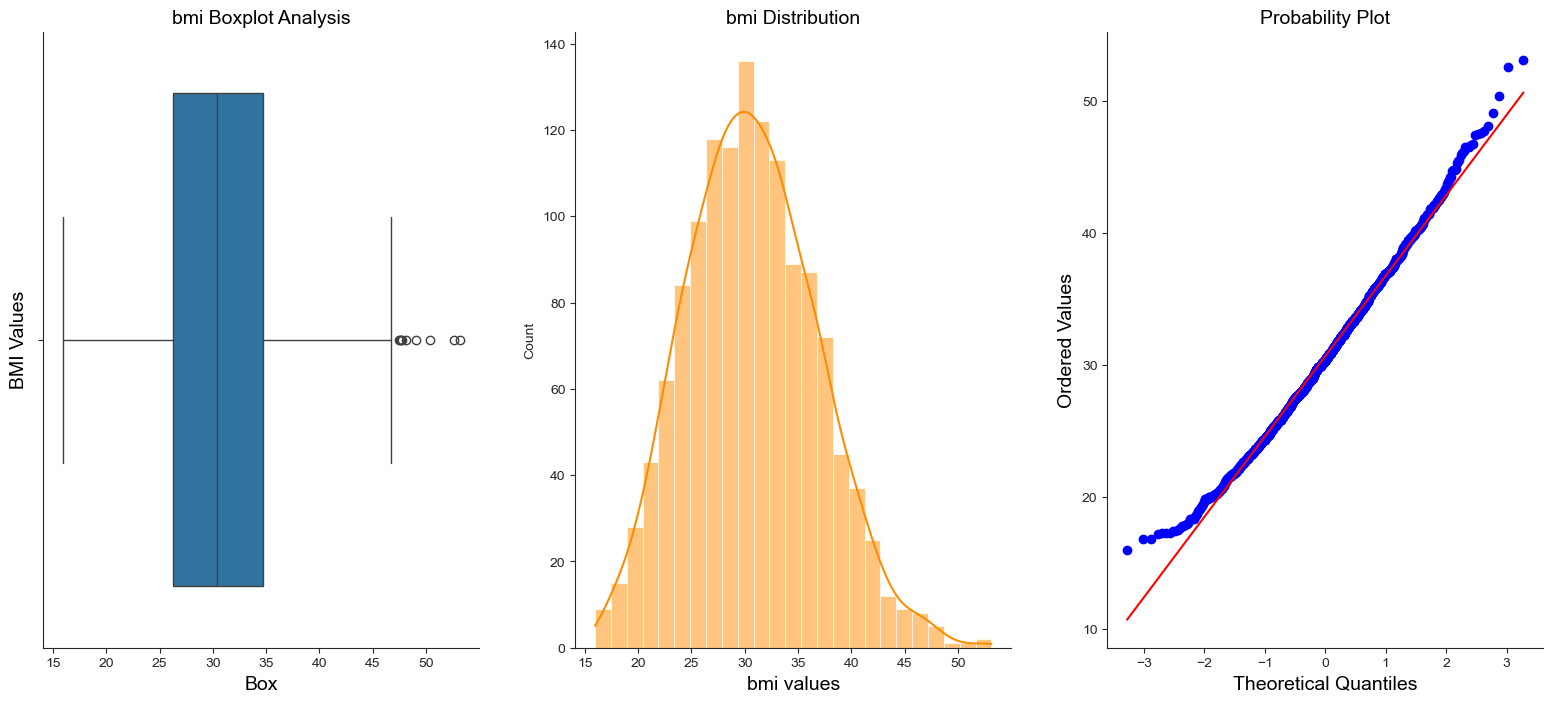

In [9]:
from scipy import stats
from scipy.stats import norm, skew, kurtosis

def data_transform(data, input):
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 8))
    sns.boxplot(x=input, data=data, ax=ax1, orient='v')  # Boxplot to check data spread and outliers
    sns.histplot(data[input], ax=ax2, color='darkorange', kde=True)  # Histogram with KDE for distribution shape
    res = stats.probplot(data[input], plot=ax3)  # Probability plot to check normality

    # Test skewness
    skewness_val = skew(data[input], nan_policy='omit')
    print(f"Skewness of {input}: {skewness_val:.3f}")

    # Ajustement d’un modèle linéaire simple y = alpha + beta*x
    x = data[input].dropna().values
    y = data['charges'].dropna().values
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    print(f"Linear model p-value (charges ~ {input}): {p_value:.8f}")

    kwargs = {'fontsize': 14, 'color': 'black'}
    ax1.set_title(input + ' Boxplot Analysis', **kwargs)
    ax1.set_xlabel('Box', **kwargs)
    ax1.set_ylabel('BMI Values', **kwargs)

    ax2.set_title(input + ' Distribution', **kwargs)
    ax2.set_xlabel(input + ' values', **kwargs)

    ax3.set_title('Probability Plot', **kwargs)
    ax3.set_xlabel('Theoretical Quantiles', **kwargs)
    ax3.set_ylabel('Ordered Values', **kwargs)

    f.subplots_adjust(wspace=0.22, right=2)
    sns.despine()
    return plt.show()

data_transform(df, 'bmi')


## Categorize BMI value 

Let create some classification group from the BMI values.

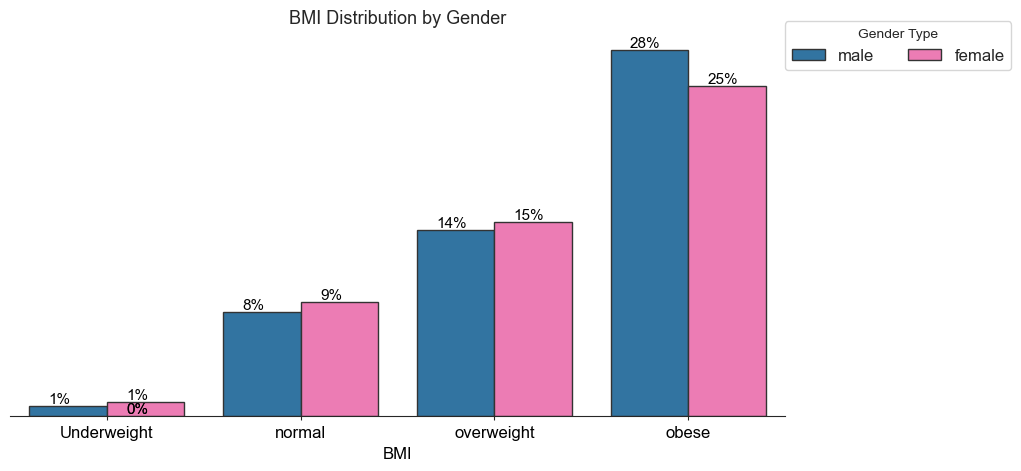

In [10]:
cut_points = [14,19,25,30,65]
label_names = ['Underweight',"normal","overweight","obese"]
df["bmi_cat"] = pd.cut(df['bmi'],cut_points,labels=label_names)
gender_dist_plot('bmi_cat','BMI')

## Charges Feature Analysis

Let visualize the Charge feature to see how it is distributed. It will be better for our model if the charge feature is kinda normally distributed or have few outliers

Skewness of charges: 1.514
Linear model p-value (charges ~ charges): 0.00000000


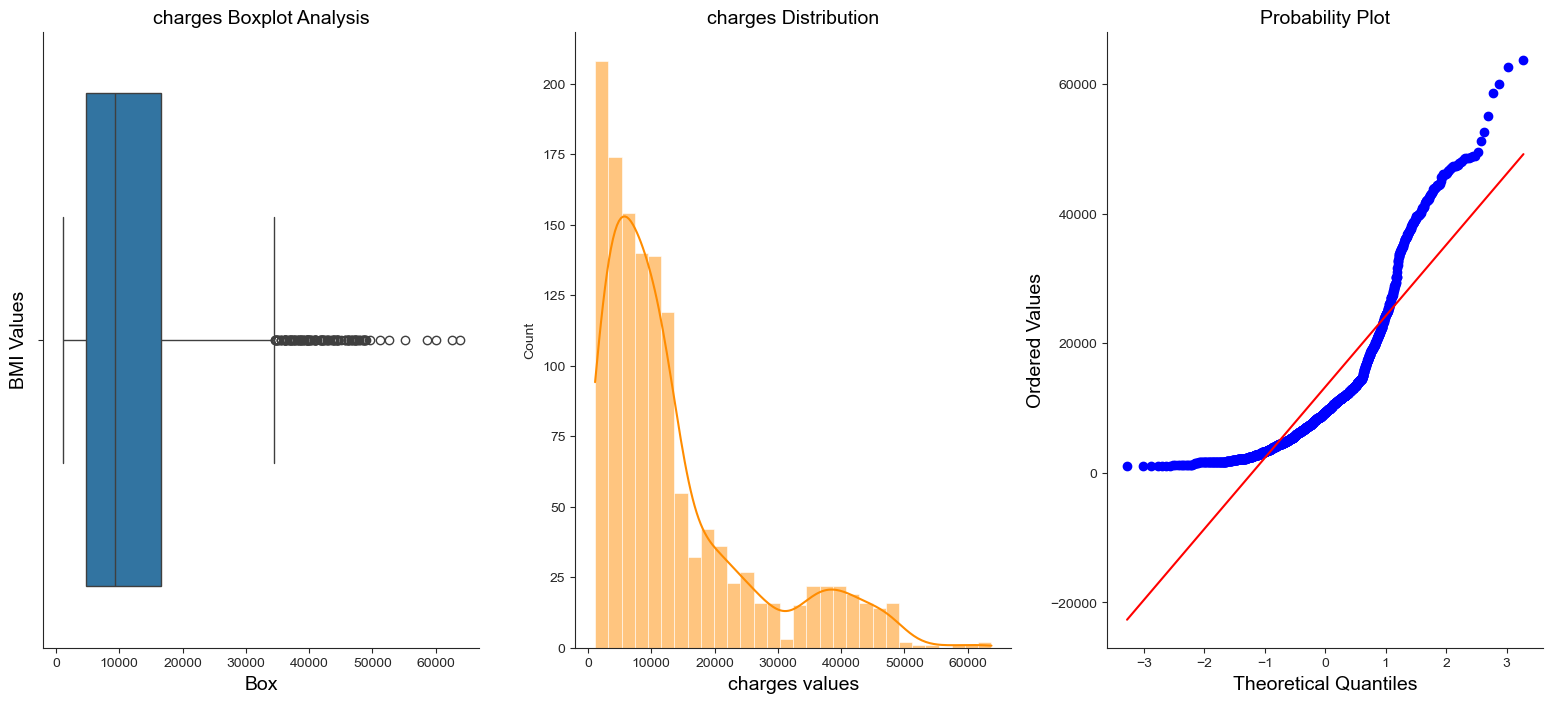

In [11]:
data_transform(df,'charges')

From the analysis above, we can observed the following:
    1. The charge feature is Not normally distributed 
    2. VERY Skew to the left. 
    3. The Charge distribution is heavily affected by OUTLIERS.
To solve the issue mention above, we will use the natural Log transformation on the Charge to reduce outliers and  skweness

Skewness of charges: -0.090
Linear model p-value (charges ~ charges): 0.00000000


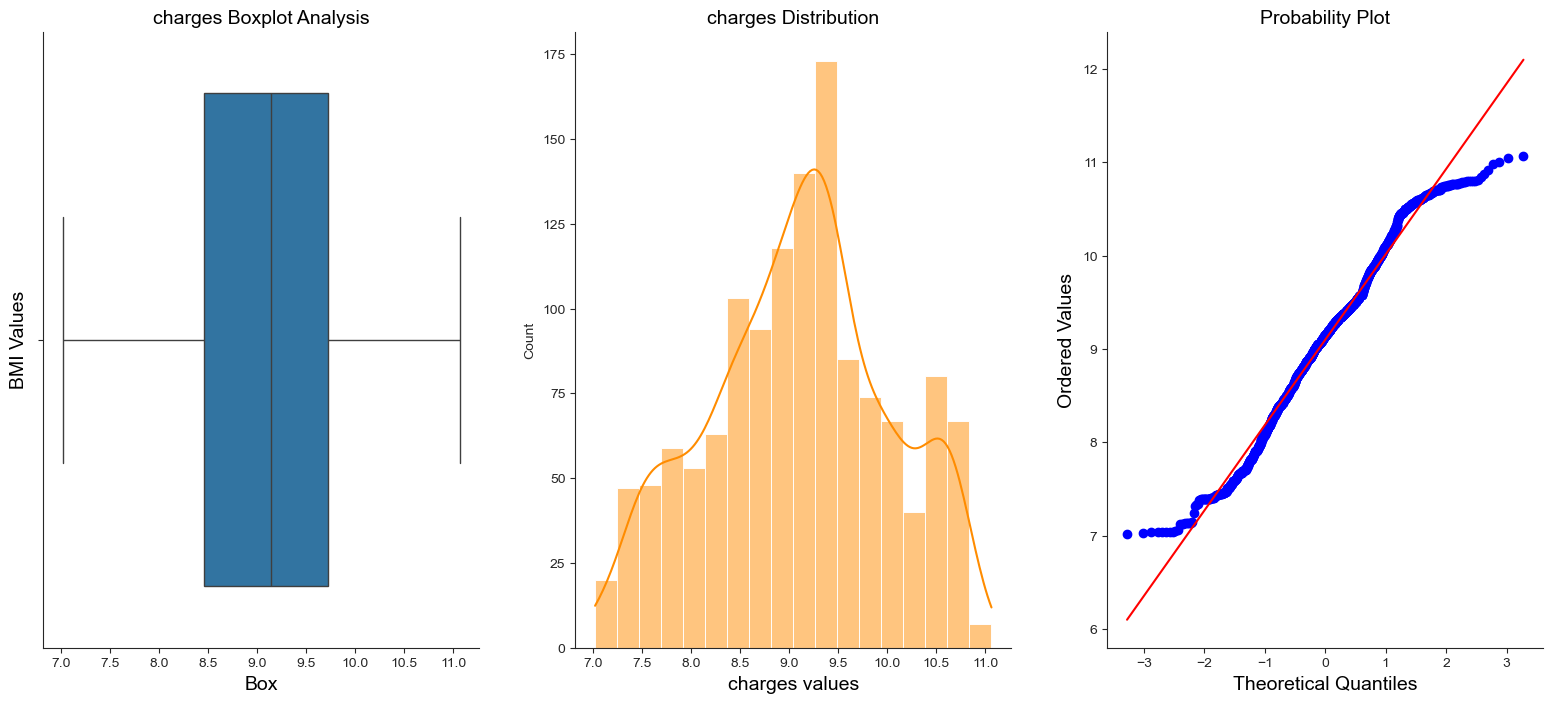

In [12]:
df.charges = np.log1p(df.charges)
data_transform(df,'charges')

# Machine Learning Section

This problem is a Multivariate Linear Regression. I am going to approach this technique in two different ways:
        1. Using Linear Regression 
        2. Using Other Machine Learning method

### Scatter Plot Analysis

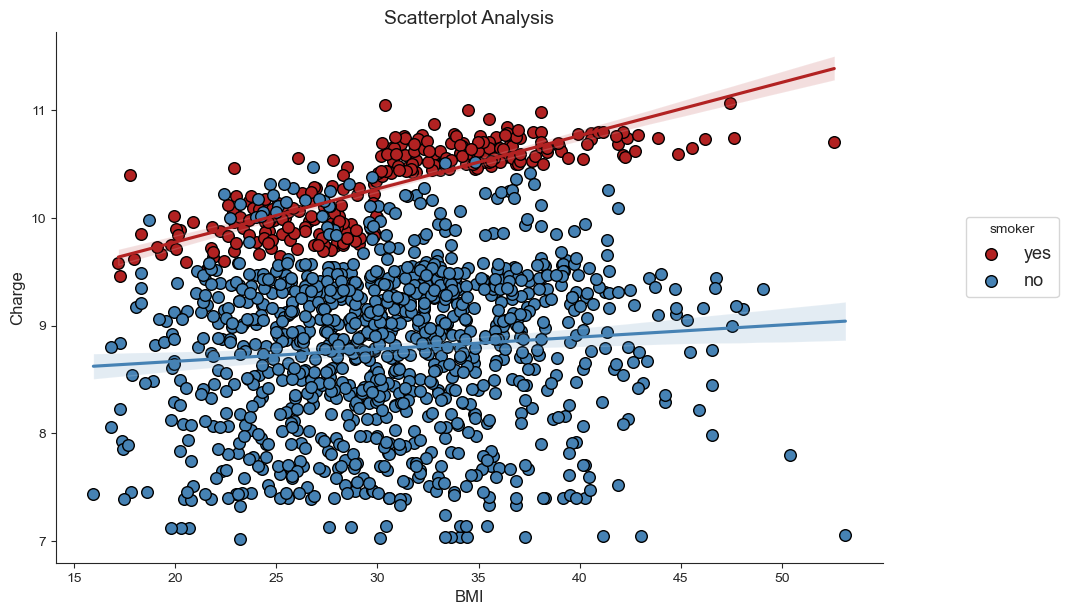

In [13]:
def scatter_analysis(hue_type, palette, data):
    sns.lmplot(x='bmi', y='charges', hue=hue_type, data=data, palette=palette, height=6, aspect=1.5,
               scatter_kws={"s": 70, "alpha": 1, 'edgecolor': 'black'}, legend=False, fit_reg=True)  # Scatter with regression lines
    plt.title('Scatterplot Analysis', fontsize=14)
    plt.xlabel('BMI', fontsize=12)
    plt.ylabel('Charge', fontsize=12)
    plt.legend(loc=[1.1, 0.5], title=hue_type, fontsize=13)
    plt.show()

scatter_analysis('smoker', ['firebrick', 'steelblue'], df)

### Correlation Analysis

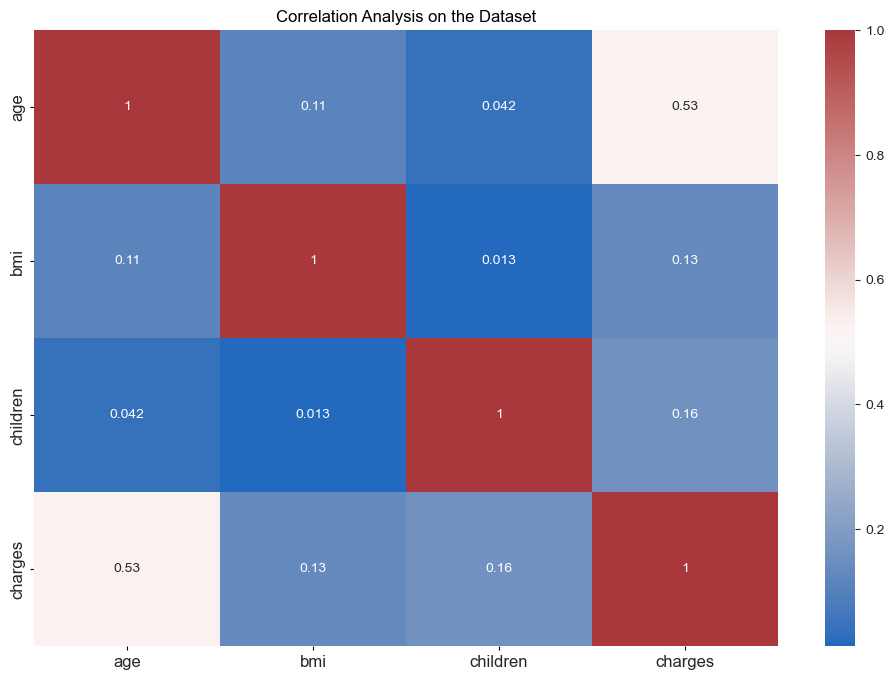

In [14]:
plt.figure(figsize=(12, 8))
kwargs = {'fontsize': 12, 'color': 'black'}

numeric_df = df.select_dtypes(include=['number'])

# Heatmap showing correlation matrix with coolwarm color scheme
sns.heatmap(numeric_df.corr(), annot=True, robust=True, cmap="vlag")
plt.title('Correlation Analysis on the Dataset', **kwargs)
plt.tick_params(length=3, labelsize=12, color='black')
plt.show()

** Heatmap Comment** The analysis on the dataset as a whole only show a strong correlation with the Age but we know from the scatter plot above that they may be a correlation with bmi if you are a smoker. So, we will split the dataset into two parts as mention above and performs the analysis on each category

## Part 1: Smoker Dataset Analysis

In [15]:
# Drop categorical variables created during EDA if they exist
columns_to_drop = ['age_cat', 'bmi_cat']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1, inplace=True)
# Split the data into smoker dataset
df_smoker = df[df.smoker == 'yes']
# Convert all categorical variables in the smoker dataset to numerical via one-hot encoding
df_smoker = pd.get_dummies(df_smoker, drop_first=True)
from scipy.stats import pearsonr

## Statistical Analysis

Early above, the scatter plot was indicating that there is a relationship between the bmi values and the charges. Two analytic methods (Correlation and p_value analysis) will be performed to determine if the relationship can be proven statistically. 

#### correlation Analysis

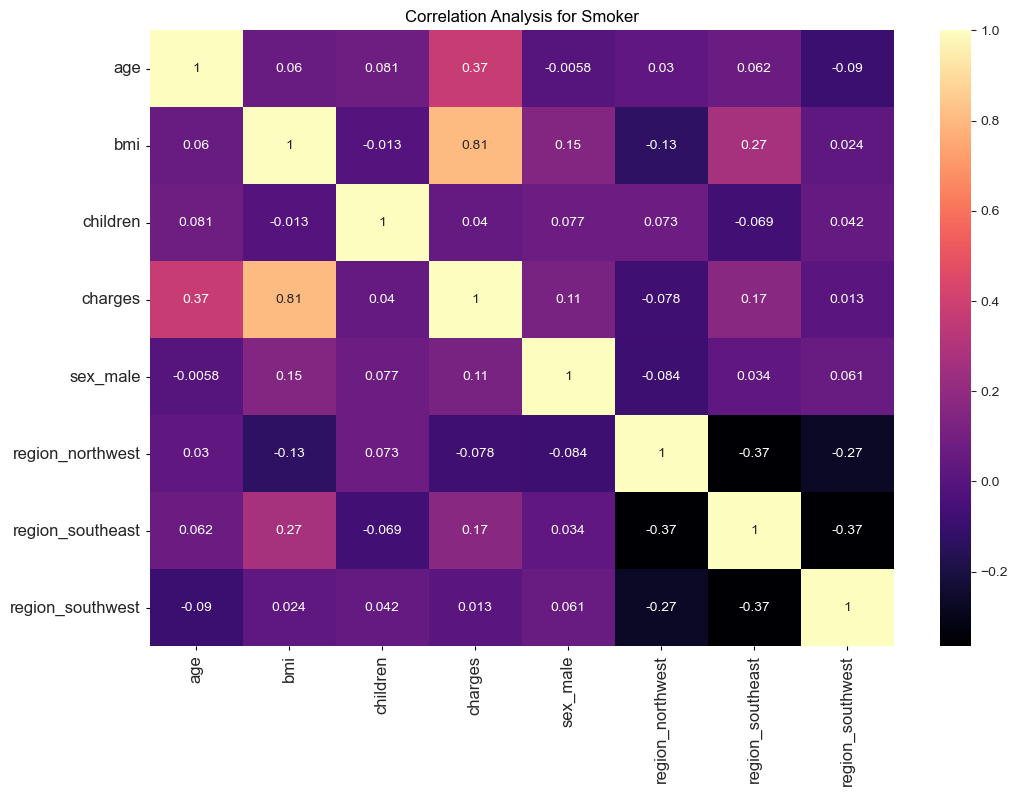

In [16]:
plt.figure(figsize=(12, 8))
kwargs = {'fontsize': 12, 'color': 'black'}

# Display correlation heatmap for smoker data
sns.heatmap(df_smoker.corr(), annot=True, robust=True, cmap='magma')
plt.title('Correlation Analysis for Smoker', **kwargs)
plt.tick_params(length=3, labelsize=12, color='black')
plt.yticks(rotation=0)
plt.show()

There is a strong Correlation between the bmi and age parameters and charges. However there are no correlation between others parameters and Charges. 

#### p_value Analysis

In [17]:
# Calculate p-values for Pearson correlation between 'charges' and other variables in smoker dataset
p_value = [round(pearsonr(df_smoker['charges'], df_smoker[i])[1], 4) for i in df_smoker.columns]
# Create a DataFrame to display variable names and corresponding p-values
pvalue_table = pd.DataFrame(p_value, df_smoker.columns).reset_index()
pvalue_table.columns = ['columns_name', 'p_value']
# Sort the table by ascending p_value
pvalue_table.sort_values('p_value', inplace=True)
pvalue_table

,columns_name,p_value
0,age,0.0000
1,bmi,0.0000
3,charges,0.0000
6,region_southeast,0.0042
4,sex_male,0.0681
5,region_northwest,0.1961
2,children,0.5067
7,region_southwest,0.8315


Conclusion : we will drop all the columns with low p_value(less than 0.05) including region_southeast

####  Scatter plot Analysis for smoker

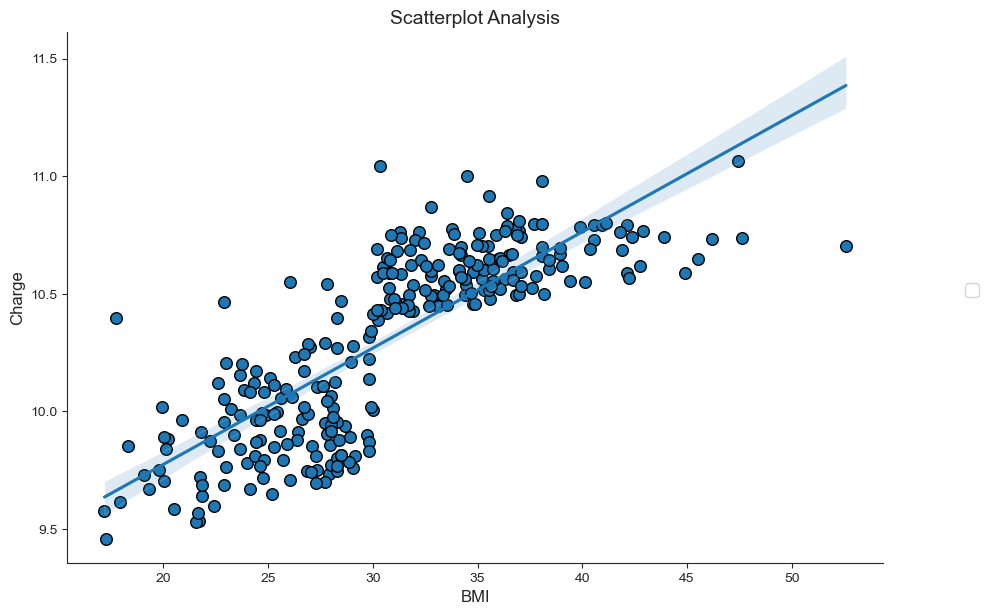

In [18]:
cols_to_drop = ['children', 'sex_male', 'region_northwest', 'region_southeast', 'region_southwest']
cols_existing = [col for col in cols_to_drop if col in df_smoker.columns]
if cols_existing:
    df_smoker.drop(cols_existing, axis=1, inplace=True)  # Drop columns if they exist
scatter_analysis(None, ['darkorange', 'midnightblue'], df_smoker)  # Scatter plot without hue

Now we know this age and bmi have a relationship with charges and from the scatter plot, that relationship seems to be linear. Therefore we will use a linear model for the machine leaning analysis also called **Multivariate Linear Regression**. The model used for our prediction will be of the form 
        **y_predict = intercept + cte1 x age + cte2 x bmi**
        where intercept, cte_1 and cte_2 are all constant that we will be trying to find

## Multivariate Linear Regression Analysis for Smoker

In [19]:
from sklearn.metrics import explained_variance_score,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor 

#### Multivariate Model built & Coefficient

In [20]:
X = df_smoker.drop('charges',axis=1)
y = df_smoker['charges']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
#Standardizing the values
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Pour le modèle GLM Gamma : ajoute l’intercept dans X
X_gamma = df_smoker[['age', 'bmi']]  # adapte cette liste selon tes variables
X_gamma = sm.add_constant(X_gamma)
y_gamma = df_smoker['charges']

## Build  & Evaluate our Model
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('intercept: {:.4f} \ncte1: {:.4f} \ncte2: {:.4f}'.format(model.intercept_,model.coef_[0],model.coef_[1]))
print('Model_Accuracy_Score (R Square): {:.4f} \nLoss(RMSE): {:.4f}'.format(r2_score(y_pred,y_test),np.sqrt(mean_squared_error(y_pred,y_test))))

intercept: 10.3139 
cte1: 0.1225 
cte2: 0.3037
Model_Accuracy_Score (R Square): 0.6670 
Loss(RMSE): 0.1870


The model accuracy score being about ** 0.7**  it isn't that bad for a linear regression. the loss is **less than 0.2**.
Now let visualize the predicted values vs. testvalues on a scatter plot. What we expect is to see the point group together and forming a linear trend so that a point will have close value from the x and y axis.

#### Linear Regression Visualization Result for Smoker

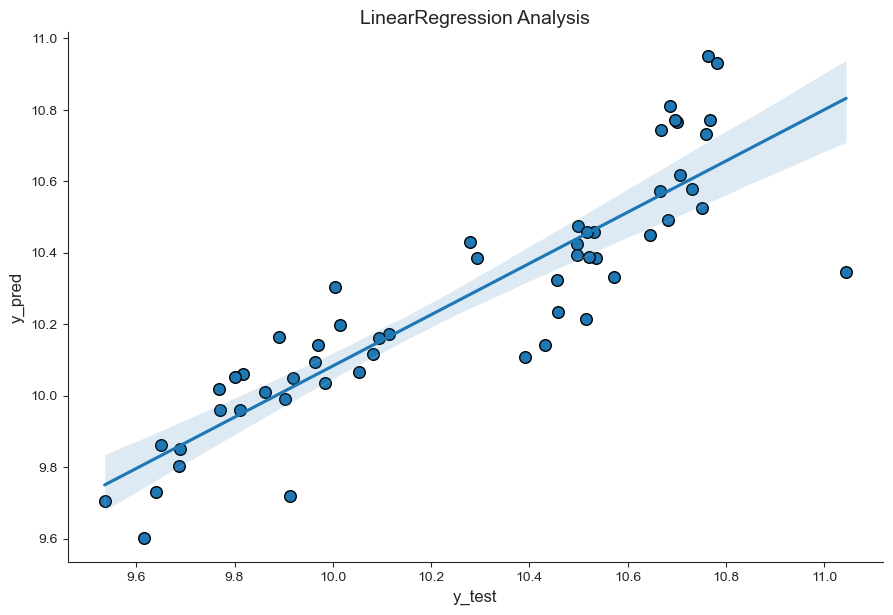

In [21]:
def model_scatter_plot(model):
    title = str(model).split('.')[-1].replace("'>", "")  # Extract clean model name
    lreg = model()
    lreg.fit(X_train, y_train)
    y_pred = lreg.predict(X_test)
    model_table = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})  # Create DataFrame for plot
    # Use 'height' instead of deprecated 'size' in lmplot
    sns.lmplot(x='y_test', y='y_pred', data=model_table, height=6, aspect=1.5,
               scatter_kws={"s": 70, "alpha": 1, 'edgecolor': 'black'}, fit_reg=True)
    plt.title(title + ' Analysis', fontsize=14)
    plt.xlabel('y_test', fontsize=12)
    plt.ylabel('y_pred', fontsize=12)
    plt.show()

model_scatter_plot(LinearRegression)

#### use the Model on real data 

In [22]:
def model_apply(age,bmi_value):
    ## Ex: for a smoker who is age number with bmi = bmi_value, 
    #how much would he pay for insurance
    c = [[age, bmi_value]]
    #we have to transform the data from the standard scaler
    c = sc.transform(c)
    charge_value = model.coef_[0]*(c[0][0]) + model.coef_[1]*(c[0][1]) + model.intercept_
    charge_value = np.exp(charge_value) 
    x = ('The Insurrance Charges for a {:.1f} years old person who is a Smoker with an bmi = {:.1f} will be {:.4f}'.format(age,bmi_value,charge_value))
    # we use the np.exp() because we transformed the value of charge during the charge EDA earlier above
    return print(x)

In [23]:
#if you are a smoker of 19 yr old and bmi of 32 then what insurrance would you be charged?
model_apply(19,32)

The Insurrance Charges for a 19.0 years old person who is a Smoker with an bmi = 32.0 will be 26684.0872


## Explore Other Machine Learning Models

For these other models, the advantage the have is their flexibility and disadvantage is their Interpretability. In these models we are not looking for coefficient cuz they are None. So, the model will be evaluated base on the R square and minimal loss.  

#### Models Score visualisation for other Machine Learning methods for smoker

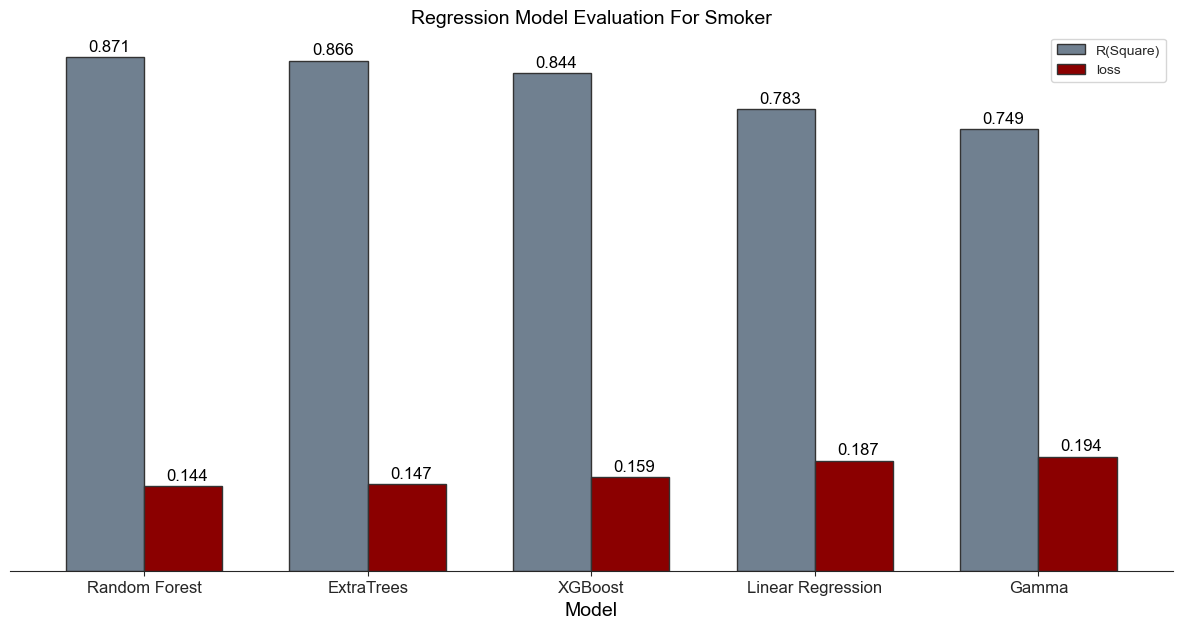

In [24]:
def robust_model(input):
    model_list = [ExtraTreesRegressor(),
        RandomForestRegressor(),
        LinearRegression(),
        'GLM_Gamma',
        XGBRegressor(
            n_estimators=500,
            learning_rate=0.05,
            max_depth=4,
            subsample=0.8,
            colsample_bytree=0.8,
            objective='reg:squarederror',
            random_state=0,
            n_jobs=-1
        )
    ]
    model_str = ['ExtraTrees', 'Random Forest', 'Linear Regression', 'Gamma', 'XGBoost']
    r_score, loss = [], []
    for idx, reg in enumerate(model_list):
        if reg == 'GLM_Gamma':
            glm = sm.GLM(y_gamma, X_gamma, family=sm.families.Gamma(sm.families.links.log()))
            res = glm.fit()
            y_pred = res.predict(X_gamma)
            r_score.append(r2_score(y_gamma, y_pred))   # R² score
            loss.append(np.sqrt(mean_squared_error(y_gamma, y_pred)))   # RMSE
        else:
            reg.fit(X_train, y_train)
            y_pred = reg.predict(X_test)
            r_score.append(r2_score(y_test, y_pred))    # R² score
            loss.append(np.sqrt(mean_squared_error(y_test, y_pred)))    # RMSE
    other_model = pd.DataFrame({'Model': model_str, 'R(Square)': r_score, 'loss': loss})
    other_model.sort_values('R(Square)', ascending=False, inplace=True)
    ax = other_model[['R(Square)', 'loss']].plot(kind='bar', width=0.7, figsize=(15, 7), color=['slategray', 'darkred'], fontsize=13, edgecolor='0.2')
    for i in ax.patches:
        ax.text(i.get_x() + .1, i.get_height() + 0.01, str(round(i.get_height(), 3)), fontsize=12, color='black')
    ax.set_title('Regression Model Evaluation For ' + input, fontsize=14, color='black')
    ax.set_xticklabels(other_model.Model, rotation=0, fontsize=12)
    ax.set_xlabel('Model', fontsize=14, color='black')
    ax.axes.get_yaxis().set_visible(False)
    sns.despine(left=True)
    return plt.show()
    
robust_model('Smoker')

#### Models Visualization for other Machine Learning methods

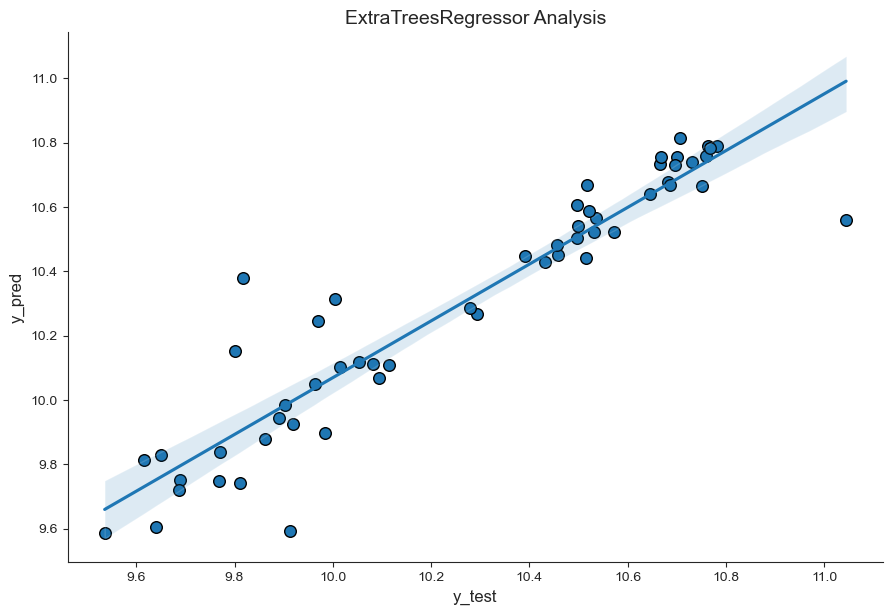

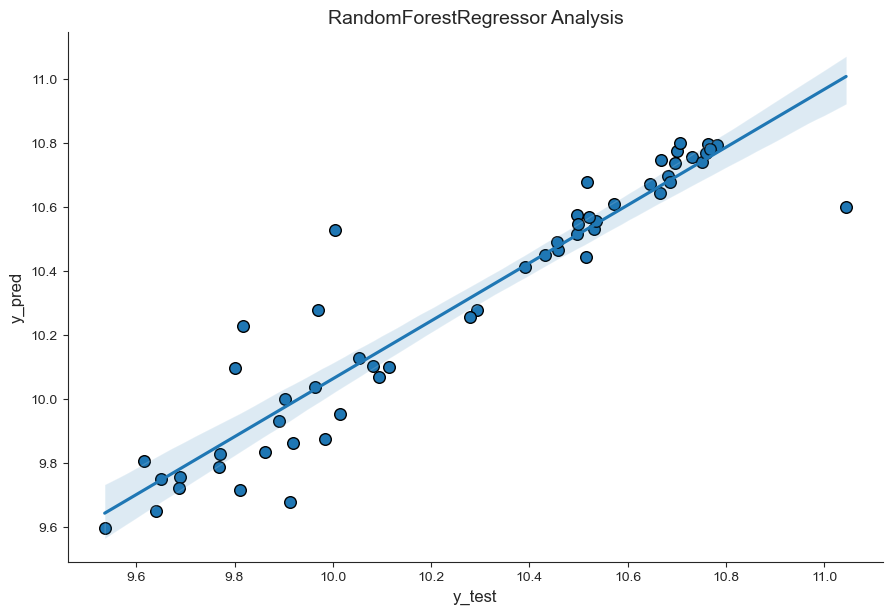

In [25]:
# Let's visualize the test data vs. the predicted data
model_scatter_plot(ExtraTreesRegressor)

model_scatter_plot(RandomForestRegressor)

## Part 2: Dataset for Non-Smoker

#### Scatter plot analysis for non-smoker 

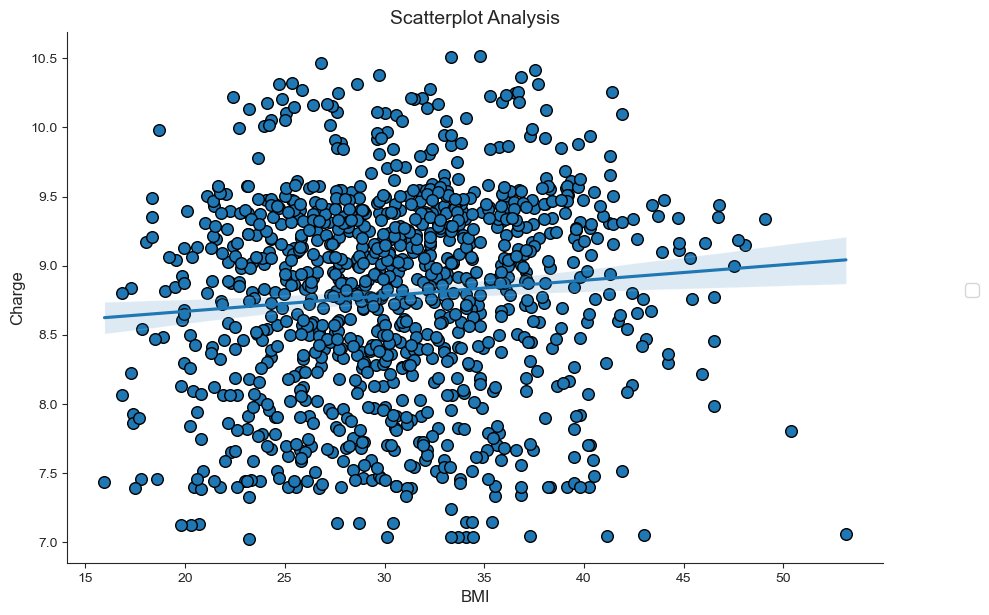

In [26]:
df_non_smoker = df[df.smoker=='no']

scatter_analysis(None,['ForestGreen','saddlebrown'],df_non_smoker)

#### Heatmap for Non-smoker analysis

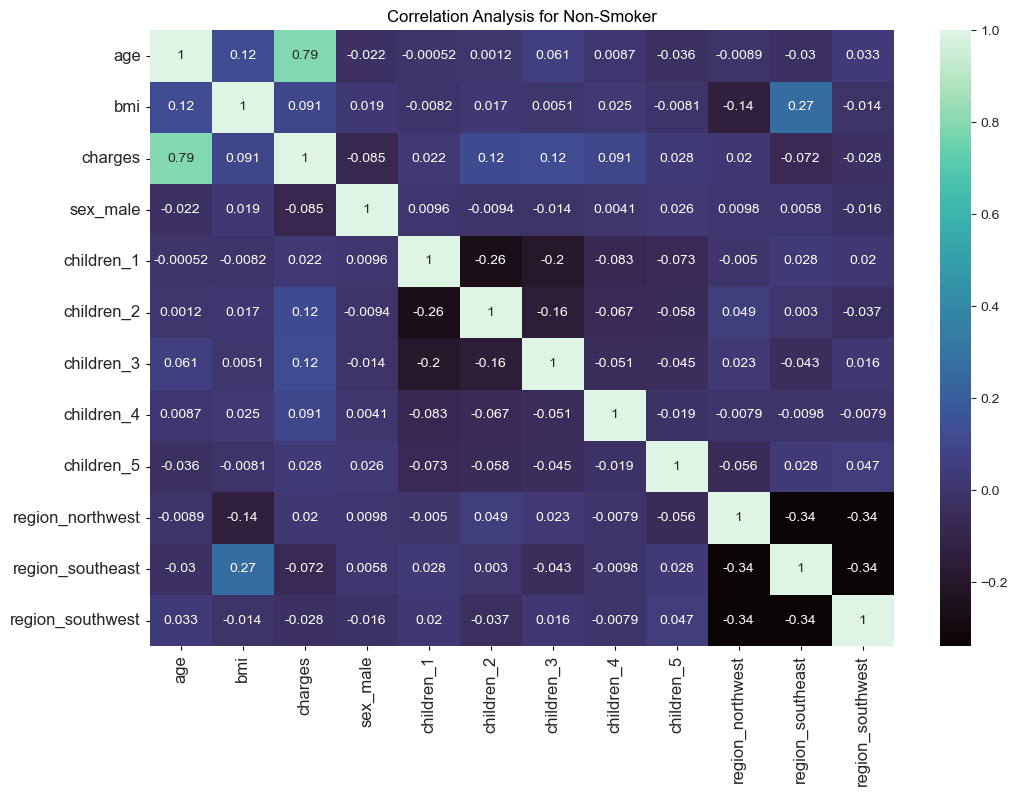

In [27]:
df_non_smoker['children'] = df_non_smoker['children'].astype('category')  # Convert to category type
df_non_smoker = pd.get_dummies(df_non_smoker, drop_first=True)  # One-hot encode categorical variables

plt.figure(figsize=(12, 8))
kwargs = {'fontsize': 12, 'color': 'black'}
sns.heatmap(df_non_smoker.corr(), annot=True, robust=True, cmap='mako')  # Correlation heatmap
plt.title('Correlation Analysis for Non-Smoker', **kwargs)
plt.tick_params(length=3, labelsize=12, color='black')
plt.yticks(rotation=0)
plt.show()

From the heat map above we can observe that only the age is strongly correlated to the charges

#### Scatter plot of Age vs. Charges

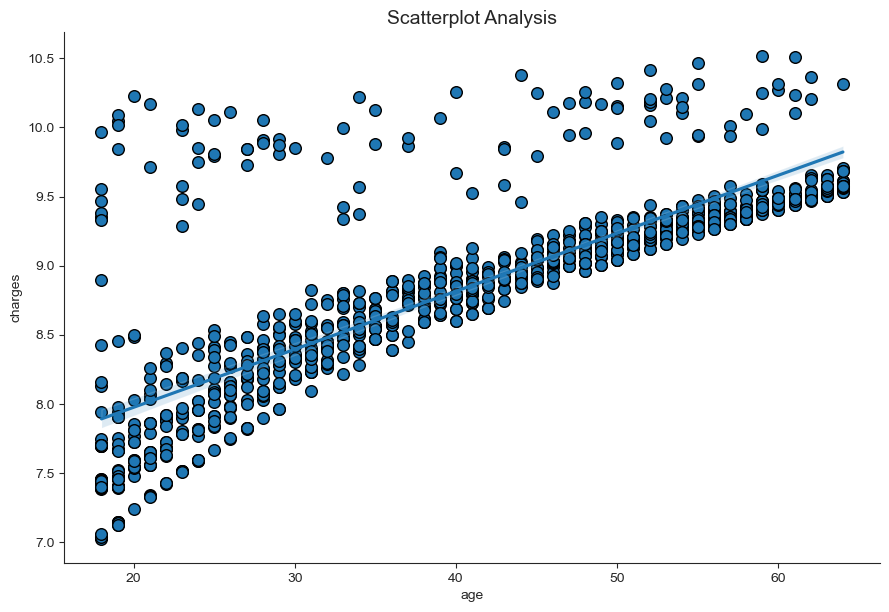

In [28]:
sns.lmplot(x='age', y='charges', data=df_non_smoker, height=6, aspect=1.5,
           scatter_kws={"s": 70, "alpha": 1, 'edgecolor': 'black'}, legend=False, fit_reg=True)  # Scatterplot with regression line
plt.title('Scatterplot Analysis', fontsize=14)
plt.show()

### Simple Linear Regression Analysis for Non Smoker

Because only Age in correlated to charges, we are going to use a simple linear model for this section. So, there will be only one coefficient and intercept that we need to find

In [29]:
X = df_non_smoker['age'].values.reshape(-1, 1)  # Reshape for sklearn
y = df_non_smoker['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

sc = StandardScaler()  # Standardize features
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = LinearRegression()  # Fit linear regression model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('intercept: {:.4f} \ncoef: {:.4f}'.format(model.intercept_, model.coef_[0]))  # Model coefficients
print('Model_Accuracy_Score (R Square): {:.4f} \nLoss(RMSE): {:.4f}'.format(r2_score(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))))  # Model

intercept: 8.7788 
coef: 0.5883
Model_Accuracy_Score (R Square): 0.6213 
Loss(RMSE): 0.4689


#### Linear Regression Visualization Result For Non Smoker

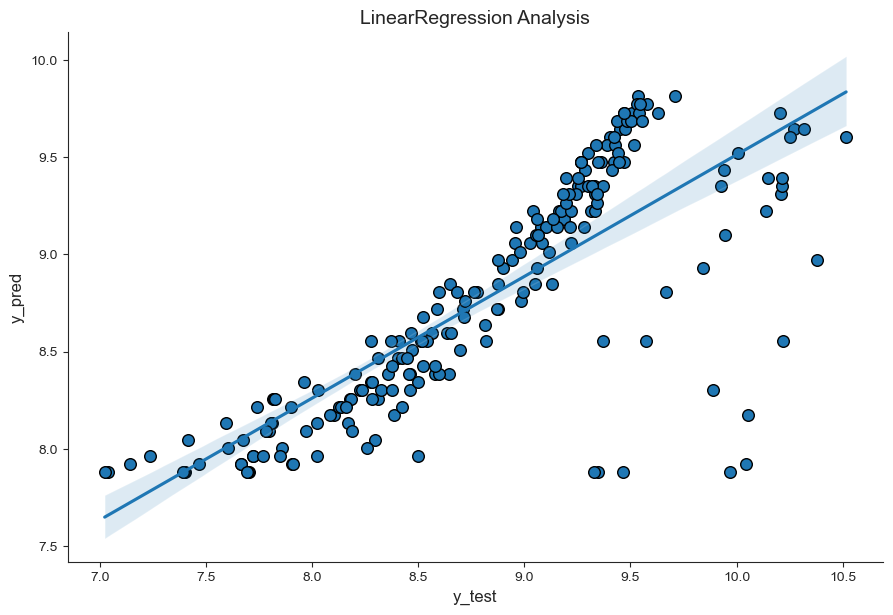

In [30]:
model_scatter_plot(LinearRegression)

The scatter plot of the predicted vs. test values for non smoker show that the age distribution need to be transformed to have a better age distribution

#### Models Score visualisation for other Machine Learning methods for non smoker

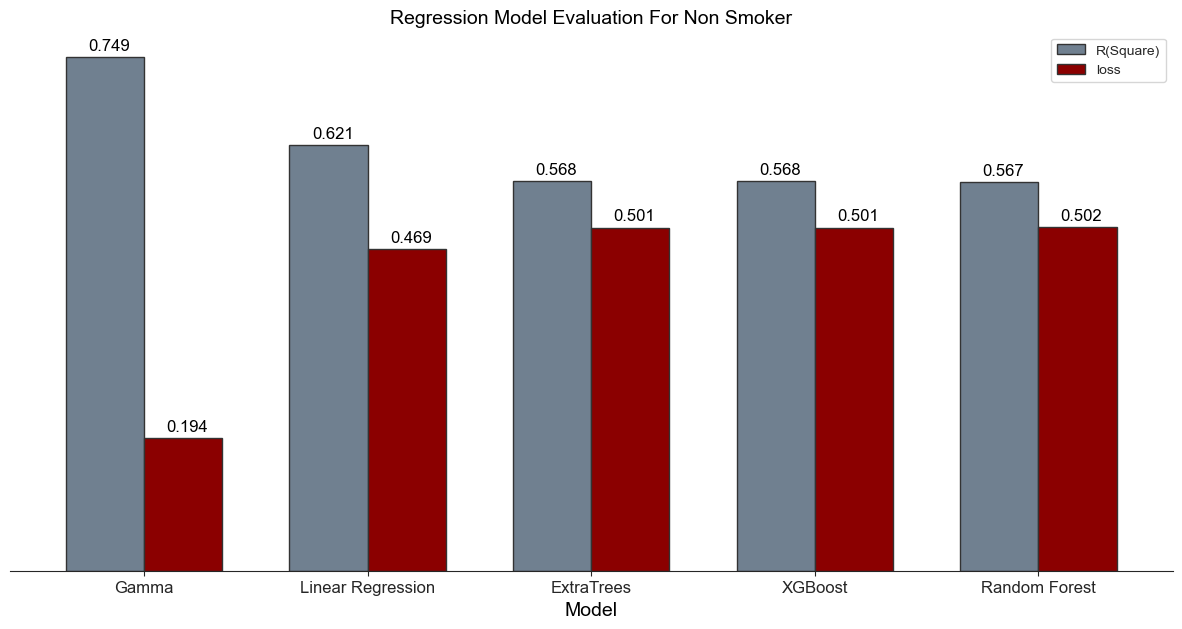

In [31]:
robust_model('Non Smoker')

 The R^2 for the models are very low which show that the model don't perform well....ie bad model. Also the loss, which is the root mean square error, is very high which imply a wider gap between the predicted value and the true value